<a href="https://colab.research.google.com/github/geophase/Machine-Learning-on-Classical-and-Quantum-Data-Photonics-MSc-/blob/main/SecondassignmentPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Second assignment**

1. Import the cifar10 dataset. Explore the different kind of images present in the dataset. This dataset is known to be much more difficult to classify than the MNIST dataset. Do a PCA analysis of the original data. Is there some visible structure in the data?


**Cifar10** dataset is a commonly used collection of images to train machine learning algorithms. There are 60,000 images divided in 10 classes. 

**PCA (Principal Component Analysis)** is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. 

 It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.


In [ ]:
import keras
from keras.models import Sequential, Model
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10  #import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

(x_train, y_train1),(x_test, y_test1)=cifar10.load_data()  #loading CIFAR10, which has a structure coming in a tuple of numpy arrays.

print('Traning data shape:', x_train.shape) 
print('Testing data shape:', x_test.shape)

classes = np.unique(y_train1)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


170500096/170498071 [==============================] - 3s 0us/step
Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


The data in cifar10 is structured in 4-dim arrays. As we have said before, the dataset has 50,000+10,000 images (32x32) in size and already separated in training and testing sets. It is already labeled and classified in classes (10). 

 First we are going to explore what is inside the dataset. 


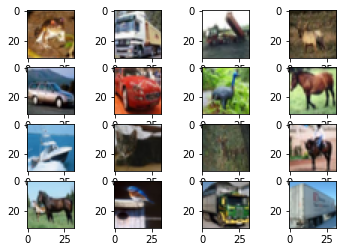

Text(0.5, 1.0, 'Label:6')


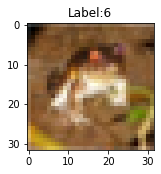

In [ ]:

def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0, 4):
        for j in range(0, 4):
            plt.subplot2grid((4, 4), (i, j))
            plt.imshow(X[k])
            k = k + 1
    # show the plot
    plt.show()


show_imgs(x_train[:16])

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("Label:" + str(y_train1[0][0]) + ""))


To apply the PCA algorithm we need to reshape and normalize the data. 

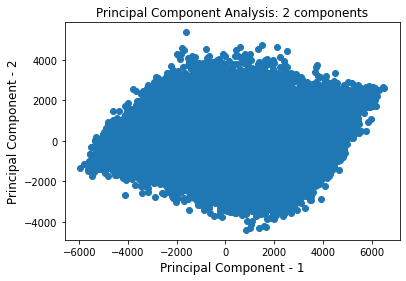

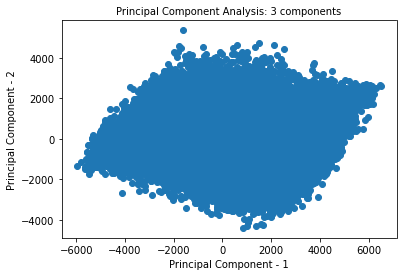

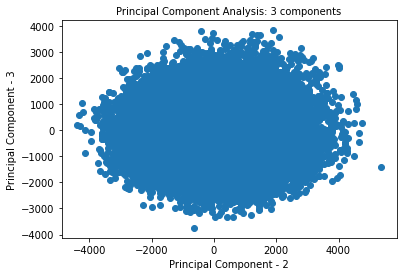

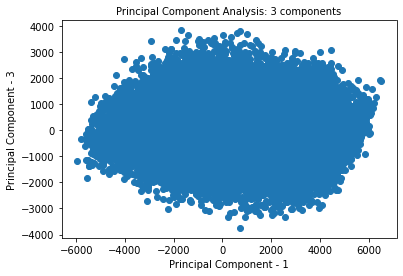

In [ ]:
x_train1 = x_train.astype('float32') / 255.
x_test1 = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Create PCA of 2 and 3 components and fit them
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(x_train)

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(x_train)

#Show results of the PCA made for 2 components
plt.figure
plt.scatter(X_pca2[:, 0], X_pca2[:, 1])
plt.xlabel('Principal Component - 1',fontsize=12)
plt.ylabel('Principal Component - 2',fontsize=12)
plt.title('Principal Component Analysis: 2 components',fontsize=12)
plt.show()

#Show results of the PCA made for 3 components
plt.figure(1)
plt.scatter(X_pca3[:, 0], X_pca3[:, 1])
plt.xlabel('Principal Component - 1',fontsize=10)
plt.ylabel('Principal Component - 2',fontsize=10)
plt.title('Principal Component Analysis: 3 components',fontsize=10)

plt.figure(2)
plt.scatter(X_pca3[:, 1], X_pca3[:, 2])
plt.xlabel('Principal Component - 2',fontsize=10)
plt.ylabel('Principal Component - 3',fontsize=10)
plt.title('Principal Component Analysis: 3 components',fontsize=10)

plt.figure(3)
plt.scatter(X_pca3[:, 0], X_pca3[:, 2])
plt.xlabel('Principal Component - 1',fontsize=10)
plt.ylabel('Principal Component - 3',fontsize=10)
plt.title('Principal Component Analysis: 3 components',fontsize=10)

plt.show()




There is no visible structure in the data. 

2.	Implement a fully connected neural network to classify the cifar10 dataset (you can use a similar architecture to the one for the MNIST with redefined dimensions, do 20 epochs). It should work poorly. Do a PCA analysis on the output.

We are going to create a DNN following the instructions in class. 
We train the DNN with the data. With the same amount of layers, we are using higher number of nodes than in MNIST because we weren't getting enough point at the output of the final layer. This seems logical since we have a much greater dataset than before.

In [ ]:
y_train = np_utils.to_categorical(y_train1,nClasses) 
y_test = np_utils.to_categorical(y_test1,nClasses)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))


model = Sequential()
model.add(Dense(units=1024, input_dim=3072,activation='relu'))
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=10, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, batch_size=68, epochs= 20, validation_split=0.2, verbose=1)

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 3,805,450
Trainable params: 3,805,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
589/589 [==============================] - 24s 41ms/step - loss: 31.3035 - accuracy: 0.2319 - val_loss: 2.5854 - val_accuracy: 0.2297
Epoch 2/20
589/589 [==============================] - 24s 41ms/step - loss: 2.0643 - accuracy: 0.

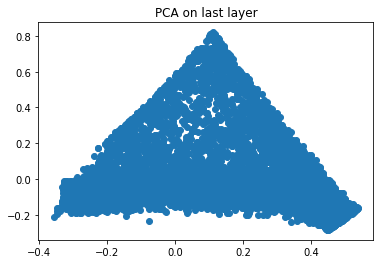

In [ ]:
#PCA analysis 

layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer('dense_11').output)
last_output = layer_model.predict(x_test)

pca2=PCA(n_components=2)
last=pca2.fit_transform(last_output)

plt.scatter(last[:, 0], last[:, 1])
plt.title('PCA on last layer')
plt.show()


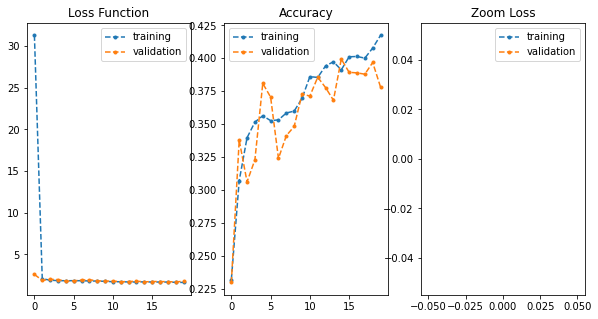

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,5))

ax=axes[0]
ax.plot(loss,'.--',label='training')
ax.plot(val_loss,'.--',label='validation')
ax.set_title('Loss Function')
ax.legend()

ax=axes[1]
ax.plot(acc,'.--',label='training')
ax.plot(val_acc,'.--',label='validation')
ax.set_title('Accuracy')
ax.legend()

ax=axes[2]
vepochs=np.arange(np.size(loss))
ax.plot(vepochs[20:],loss[20:],'.--',label='training')
ax.plot(vepochs[20:],val_loss[20:],'.--',label='validation')
ax.set_title('Zoom Loss')
ax.legend();